# Breast Cancer Detection



# Breast Cancer Detection Project

## Overview
This project aims to develop a machine learning model for the early detection of breast cancer using histopathological images. Breast cancer is one of the most common cancers among women worldwide, and early detection significantly improves the chances of successful treatment. Leveraging machine learning techniques can assist in automating the detection process and providing timely diagnosis.

## Group Members
- **[Nikhil Chaudhari]**
- **[Atharva Patil]**
- **[Madhura Kanfade]**



## Methodology
1. **Data Preprocessing**: We preprocessed the histopathological images to enhance their quality and prepare them for model training. Preprocessing steps included resizing, normalization, and augmentation.
2. **Model Selection**: We experimented with various machine learning and deep learning models, to identify the most effective architecture for breast cancer detection.
3. **Model Training**: The selected model was trained on the preprocessed dataset using appropriate training strategies, such as batch normalization, dropout, and early stopping, to prevent overfitting.
4. **Model Evaluation**: We evaluated the trained model's performance using metrics such as accuracy, precision, recall, and F1-score. Additionally, we visualized the model's predictions and analyzed its strengths and limitations.



## Conclusion
In conclusion, this project showcases the potential of machine learning techniques in breast cancer detection. By leveraging histopathological images and advanced algorithms, we developed a reliable model for early cancer diagnosis. Our work contributes to ongoing efforts to improve healthcare outcomes and reduce the burden of breast cancer worldwide.



--- 

*This project was completed as part of a minor project assignment for [Sardar Patel Institute of Technology].*


# A. Business Understanding

According to the WHO, breast cancer is the most commonly occurring cancer worldwide. In 2020 alone, there were 2.3 million new breast cancer diagnoses and 685,000 deaths. Yet breast cancer mortality in high-income countries has dropped by 40% since the 1980s when health authorities implemented regular mammography screening in age groups considered at risk. Early detection and treatment are critical to reducing cancer fatalities, and your machine learning skills could help streamline the process radiologists use to evaluate screening mammograms.

Currently, early detection of breast cancer requires the expertise of highly-trained human observers, making screening mammography programs expensive to conduct. A looming shortage of radiologists in several countries will likely worsen this problem. Mammography screening also leads to a high incidence of false positive results. This can result in unnecessary anxiety, inconvenient follow-up care, extra imaging tests, and sometimes a need for tissue sampling (often a needle biopsy).

The competition host, the Radiological Society of North America (RSNA) is a non-profit organization that represents 31 radiologic subspecialties from 145 countries around the world. RSNA promotes excellence in patient care and health care delivery through education, research, and technological innovation.

Your efforts in this competition could help extend the benefits of early detection to a broader population. Greater access could further reduce breast cancer mortality worldwide.


The goal of this competition is to indentify breast cancer. You'll train your model with screening mammograms obtained from regular screening.

Your work improving the automation of detection in screening mammography may enable radiologists to be more accurate and efficient, improving the quality and safety of patient care. It could also help reduce costs and unnecessary medical procedures.

*Resources from [website](https://www.kaggle.com/competitions/rsna-breast-cancer-detection)*

### Import Libraries

In [1]:
!cp /kaggle/input/gdcm-conda-install/gdcm.tar .
!tar -xvzf gdcm.tar
!conda install --offline ./gdcm/gdcm-2.8.9-py37h71b2a6d_0.tar.bz2
!rm -rf ./gdcm.tar

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
gdcm/
gdcm/conda-4.8.4-py37hc8dfbb8_2.tar.bz2
gdcm/gdcm-2.8.9-py37h71b2a6d_0.tar.bz2
gdcm/libjpeg-turbo-2.0.3-h516909a_1.tar.bz2
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)

######################################################################## | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [2]:
try:
    import pylibjpeg
except:
    !pip install /kaggle/input/rsna-2022-whl/{pydicom-2.3.0-py3-none-any.whl,pylibjpeg-1.4.0-py3-none-any.whl,python_gdcm-3.0.15-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl}

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Processing /kaggle/input/rsna-2022-whl/pydicom-2.3.0-py3-none-any.whl
Processing /kaggle/input/rsna-2022-whl/pylibjpeg-1.4.0-py3-none-any.whl
Processing /kaggle/input/rsna-2022-whl/python_gdcm-3.0.15-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Attempting uninstall: pydicom
    Found existing installation: pydicom 2.3.1
    Uninstalling pydicom-2.3.1:
      Successfully uninstalled pydicom-2.3.1


In [3]:
#! pip install -U pylibjpeg pylibjpeg-openjpeg pylibjpeg-libjpeg pydicom python-gdcm
#! pip install --upgrade pydicom

In [4]:
import numpy as np
import pandas as pd
import pandas_profiling
import warnings
import os

# visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

# install gdcm to open the DICOM file
# !pip install -qU python-gdcm pydicom pylibjpeg

import pydicom
import pylibjpeg

import glob
import cv2

from path import Path
from tqdm import tqdm,trange
import pydicom as dicom

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image.dataframe_iterator import DataFrameIterator


DEVICE='GPU'
warnings.simplefilter(action="ignore")
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [5]:
url = "/kaggle/input/rsna-breast-cancer-detection/"

train_dir = url+"train_images/"
train_df = pd.read_csv(url+"train.csv")
train_df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [6]:
test_dir = url+"test_images/"
test_df = pd.read_csv(url+"test.csv")
test_df.head()

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


In [7]:
# Shape

train_df.shape

(54706, 14)

In [8]:
# Types
train_df.dtypes

site_id                      int64
patient_id                   int64
image_id                     int64
laterality                  object
view                        object
age                        float64
cancer                       int64
biopsy                       int64
invasive                     int64
BIRADS                     float64
implant                      int64
density                     object
machine_id                   int64
difficult_negative_case       bool
dtype: object

In [9]:
# NA
train_df.isnull().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64

In [10]:
train_df["difficult_negative_case"] = train_df["difficult_negative_case"].astype(int)
train_df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,0.00,0.05,0.50,0.95,0.99,1.00
site_id,1.0,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
patient_id,5.0,3.315000e+03,3.243200e+04,6.228400e+04,6.489095e+04,6.553400e+04
image_id,68491.0,1.113745e+08,1.082689e+09,2.040921e+09,2.125032e+09,2.147472e+09
age,26.0,4.200000e+01,5.900000e+01,7.500000e+01,8.200000e+01,8.900000e+01
cancer,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
biopsy,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
invasive,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
BIRADS,0.0,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
implant,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
machine_id,21.0,2.100000e+01,4.900000e+01,2.100000e+02,2.160000e+02,2.160000e+02


In [11]:
def grab_col_names(dataframe, categorical_threshold=10, cardinal_threshold=20):
    """
    It gives the names of categorical, numerical and categorical but cardinal,nominal variables in the data set.
    Note: Categorical variables but numerical variables are also included in categorical variables.

    Parameters
    ----------
    dataframe : dataframe
        The dataframe from which variables names are to be retrieved.
    categorical_threshold : int, optional
        class threshold for numeric but categorical variables
    cardinal_threshold : int, optional
        Class threshold for categorical but cardinal variables

    Returns
    -------
        categorical_cols : list
            Categorical variable list
        numerical_cols : list
            Numerical variable list
        cardinal_cols : list
            Categorical looking cardinal variable list

    Examples
    -------
        import seaborn as sns
        df = sns.load_titanic_dataset("iris")
        print(grab_col_names(df))

    Notes
    -------
        categorical_cols + numerical_cols + cardinal_cols = total number of variables.
        nominal_cols is inside categorical_cols
        The sum of the 3 returned lists equals the total number of variables: categorical_cols + cardinal_cols = number of variables

    """

    categorical_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    nominal_cols = [col for col in dataframe.columns if
                    dataframe[col].nunique() < categorical_threshold and dataframe[col].dtypes != "O"]
    cardinal_cols = [col for col in dataframe.columns if
                     dataframe[col].nunique() > cardinal_threshold and dataframe[col].dtypes == "O"]
    categorical_cols = categorical_cols + nominal_cols
    categorical_cols = [col for col in categorical_cols if col not in cardinal_cols]

    # numerical_cols
    numerical_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'categorical_cols: {len(categorical_cols)}')
    print(f'numerical_cols: {len(numerical_cols)}')
    print(f'cardinal_cols: {len(cardinal_cols)}')
    print(f'nominal_cols: {len(nominal_cols)}')
    return categorical_cols, numerical_cols, cardinal_cols, nominal_cols

In [12]:
# Değişken türlerin ayrıştırılması
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(train_df, categorical_threshold=5, cardinal_threshold=20)

Observations: 54706
Variables: 14
categorical_cols: 10
numerical_cols: 4
cardinal_cols: 0
nominal_cols: 7


In [13]:
print("Categorical column names: {}".format(categorical_cols))
print("\n")
print("Numerical column names: {}".format(numerical_cols))
print("\n")
print("Cardinal column names: {}".format(cardinal_cols))
print("\n")
print("Nominal column names: {}".format(nominal_cols))

Categorical column names: ['laterality', 'view', 'density', 'site_id', 'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'difficult_negative_case']


Numerical column names: ['patient_id', 'image_id', 'age', 'machine_id']


Cardinal column names: []


Nominal column names: ['site_id', 'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'difficult_negative_case']


In [14]:
"""

Description:
-----------

Algorithm print out comprises missing ratios and unique values of each column i a given dataframe


R&D:
---

Add '#_infinity_' column to the dataframe

"""

def MissingUniqueStatistics(df):

  import io
  import pandas as pd
  import psutil, os, gc, time
  import seaborn as sns
  from IPython.display import display, HTML
  # pd.set_option('display.max_colwidth', -1)
  from io import BytesIO
  import base64

  print("MissingUniqueStatistics process has began:\n")
  proc = psutil.Process(os.getpid())
  gc.collect()
  mem_0 = proc.memory_info().rss
  start_time = time.time()

  variable_name_list = []
  total_entry_list = []
  data_type_list = []
  unique_values_list = []
  number_of_unique_values_list = []
  missing_value_number_list = []
  missing_value_ratio_list = []
  mean_list=[]
  std_list=[]
  min_list=[]
  Q1_list=[]
  Q2_list=[]
  Q3_list=[]
  max_list=[]

  df_statistics = df.describe().copy()

  for col in df.columns:

    variable_name_list.append(col)
    total_entry_list.append(df.loc[:,col].shape[0])
    data_type_list.append(df.loc[:,col].dtype)
    unique_values_list.append(list(df.loc[:,col].unique()))
    number_of_unique_values_list.append(len(list(df.loc[:,col].unique())))
    missing_value_number_list.append(df.loc[:,col].isna().sum())
    missing_value_ratio_list.append(round((df.loc[:,col].isna().sum()/df.loc[:,col].shape[0]),4))

    try:
      mean_list.append(df_statistics.loc[:,col][1])
      std_list.append(df_statistics.loc[:,col][2])
      min_list.append(df_statistics.loc[:,col][3])
      Q1_list.append(df_statistics.loc[:,col][4])
      Q2_list.append(df_statistics.loc[:,col][5])
      Q3_list.append(df_statistics.loc[:,col][6])
      max_list.append(df_statistics.loc[:,col][7])
    except:
      mean_list.append('NaN')
      std_list.append('NaN')
      min_list.append('NaN')
      Q1_list.append('NaN')
      Q2_list.append('NaN')
      Q3_list.append('NaN')
      max_list.append('NaN')

  data_info_df = pd.DataFrame({'Variable': variable_name_list,
                               '#_Total_Entry':total_entry_list,
                               '#_Missing_Value': missing_value_number_list,
                               '%_Missing_Value':missing_value_ratio_list,
                               'Data_Type': data_type_list,
                               'Unique_Values': unique_values_list,
                               '#_Unique_Values':number_of_unique_values_list,
                               'Mean':mean_list,
                               'STD':std_list,
                               'Min':min_list,
                               'Q1':Q1_list,
                               'Q2':Q2_list,
                               'Q3':Q3_list,
                               'Max':max_list
                               })

  data_info_df = data_info_df.set_index("Variable", inplace=False)


  print('MissingUniqueStatistics process has been completed!')
  print("--- in %s minutes ---" % ((time.time() - start_time)/60))

  return data_info_df.sort_values(by='%_Missing_Value', ascending=False)#, HTML(df.to_html(escape=False, formatters=dict(col=mapping)))

In [15]:
data_info = MissingUniqueStatistics(train_df)
data_info

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.0029590368270874024 minutes ---


,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,Mean,STD,Min,Q1,Q2,Q3,Max
Variable,,,,,,,,,,,,,
BIRADS,54706,28420,0.5195,float64,"[nan, 0.0, 1.0, 2.0]",4,0.77235,0.590062,0.0,0.0,1.0,1.0,2.0
density,54706,25236,0.4613,object,"[nan, C, D, B, A]",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,54706,37,0.0007,float64,"[61.0, 55.0, 75.0, 60.0, 51.0, 62.0, 52.0, 67....",64,58.543928,10.050884,26.0,51.0,59.0,66.0,89.0
site_id,54706,0,0.0000,int64,"[2, 1]",2,1.460407,0.498434,1.0,1.0,1.0,2.0,2.0
patient_id,54706,0,0.0000,int64,"[10006, 10011, 10025, 10038, 10042, 10048, 100...",11913,32698.865262,18893.861534,5.0,16481.0,32432.0,48999.0,65534.0
image_id,54706,0,0.0000,int64,"[462822612, 1459541791, 1864590858, 1874946579...",54706,1079385987.6785,618326916.93043,68491.0,545815331.75,1082688510.5,1613227667.5,2147471846.0
laterality,54706,0,0.0000,object,"[L, R]",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,54706,0,0.0000,object,"[CC, MLO, ML, LM, AT, LMO]",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cancer,54706,0,0.0000,int64,"[0, 1]",2,0.021168,0.143944,0.0,0.0,0.0,0.0,1.0


In [16]:
# Veri setindeki sütunlar
all_columns = train_df.columns.tolist()

# Her sütunun özelliklerini kaydedeceğimiz bir sözlük
column_types = {}

for column in all_columns:
    if column in nominal_cols:
        column_types[column] = "nominal"
    elif column in categorical_cols: 
        column_types[column] = "categorical"
    elif column in numerical_cols:
        column_types[column] = "numeric"
    elif column in cardinal_cols:
        column_types[column] = "cardinal"
    else:
        column_types[column] = "unknown"

column_types    

{'site_id': 'nominal',
 'patient_id': 'numeric',
 'image_id': 'numeric',
 'laterality': 'categorical',
 'view': 'categorical',
 'age': 'numeric',
 'cancer': 'nominal',
 'biopsy': 'nominal',
 'invasive': 'nominal',
 'BIRADS': 'nominal',
 'implant': 'nominal',
 'density': 'categorical',
 'machine_id': 'numeric',
 'difficult_negative_case': 'nominal'}

In [17]:
# Her sütunun özelliklerini data_info içerisine kaydet
df_dict = pd.DataFrame.from_dict(column_types, orient="index",columns=["data_type"] )

In [18]:
data_info = pd.merge(data_info, df_dict, how="left", left_on ="Variable", right_index = True)

In [19]:
data_info

,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,Mean,STD,Min,Q1,Q2,Q3,Max,data_type
Variable,,,,,,,,,,,,,,
BIRADS,54706,28420,0.5195,float64,"[nan, 0.0, 1.0, 2.0]",4,0.77235,0.590062,0.0,0.0,1.0,1.0,2.0,nominal
density,54706,25236,0.4613,object,"[nan, C, D, B, A]",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,categorical
age,54706,37,0.0007,float64,"[61.0, 55.0, 75.0, 60.0, 51.0, 62.0, 52.0, 67....",64,58.543928,10.050884,26.0,51.0,59.0,66.0,89.0,numeric
site_id,54706,0,0.0000,int64,"[2, 1]",2,1.460407,0.498434,1.0,1.0,1.0,2.0,2.0,nominal
patient_id,54706,0,0.0000,int64,"[10006, 10011, 10025, 10038, 10042, 10048, 100...",11913,32698.865262,18893.861534,5.0,16481.0,32432.0,48999.0,65534.0,numeric
image_id,54706,0,0.0000,int64,"[462822612, 1459541791, 1864590858, 1874946579...",54706,1079385987.6785,618326916.93043,68491.0,545815331.75,1082688510.5,1613227667.5,2147471846.0,numeric
laterality,54706,0,0.0000,object,"[L, R]",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,categorical
view,54706,0,0.0000,object,"[CC, MLO, ML, LM, AT, LMO]",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,categorical
cancer,54706,0,0.0000,int64,"[0, 1]",2,0.021168,0.143944,0.0,0.0,0.0,0.0,1.0,nominal


# C. Data Analysis 

In [20]:
%matplotlib inline
# Histogram of the target categories
def histogram(df,feature):
    #df = input("Enter a DataFrame name: ")
    #col = input("Enter a target column name: ")
    #df=eval(df)
    ncount = len(df)
    ax = sns.countplot(x = feature, data=df ,palette="hls")
    sns.set(font_scale=1)
    ax.set_xlabel('Target Segments')
    plt.xticks()
    ax.set_ylabel('Number of Observations')
    fig = plt.gcf()
    fig.set_size_inches(12,10)
    # Make twin axis
    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text
    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)
    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    plt.title('Histogram of Binary Target Categories', fontsize=20, y=1.08)
    plt.show()
    #plt.savefig('col.png')
    del ncount, x, y

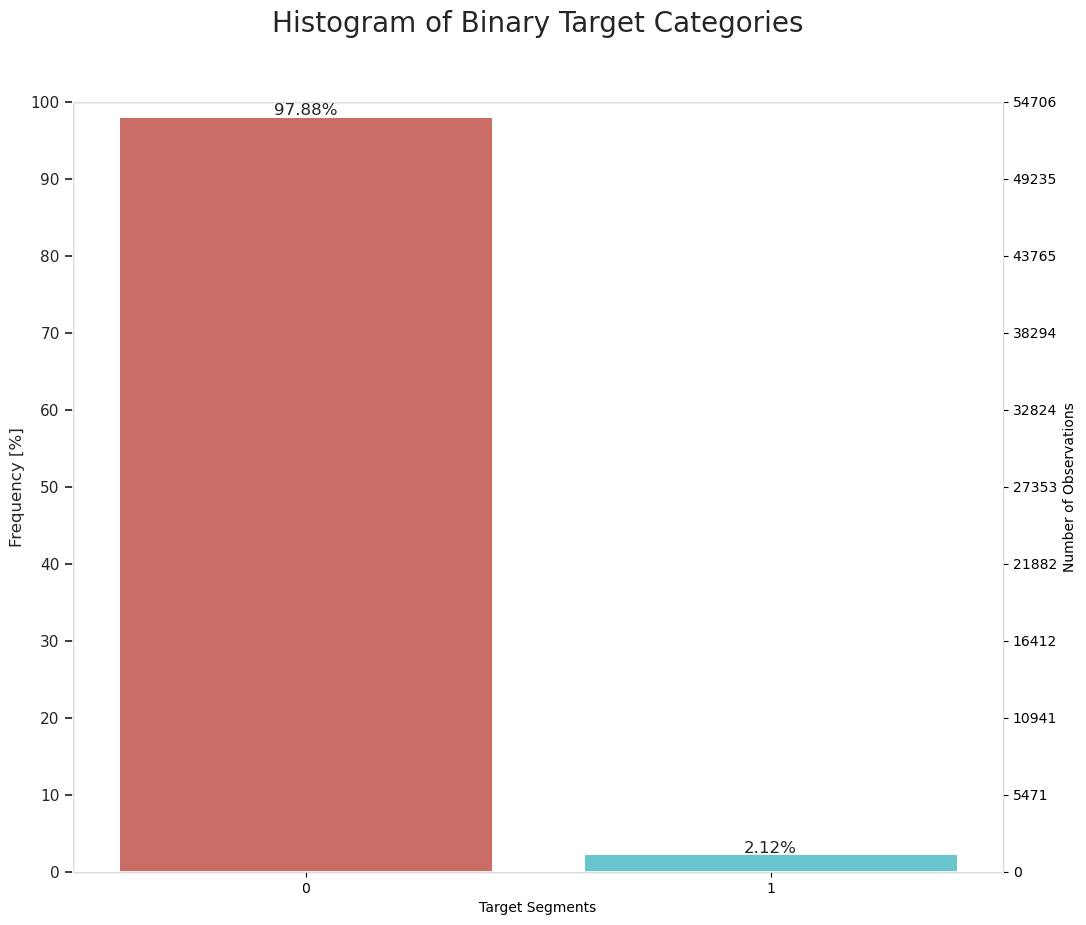

In [21]:
target = "cancer"

histogram(train_df, target)

When we look at the histogram graph, we understand that we have imbalanced dataset. We will do oversampling to solve this problem.

# C.1 Preparatory Data Analysis

In [22]:
# Outlier Handling

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + (1.5 * interquartile_range)
    low_limit = quartile1 - (1.5 * interquartile_range)
    return low_limit, up_limit

In [23]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [24]:
for col in numerical_cols:
    print(col, check_outlier(train_df, col))

patient_id False
image_id False
age True
machine_id True


In [25]:
# Accessing Outliers

def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [26]:
for col in numerical_cols:
  grab_outliers(train_df,col,True)

Empty DataFrame
Columns: [site_id, patient_id, image_id, laterality, view, age, cancer, biopsy, invasive, BIRADS, implant, density, machine_id, difficult_negative_case]
Index: []
Empty DataFrame
Columns: [site_id, patient_id, image_id, laterality, view, age, cancer, biopsy, invasive, BIRADS, implant, density, machine_id, difficult_negative_case]
Index: []
     site_id  patient_id    image_id laterality view   age  cancer  biopsy  \
739        1       10798   273930147          L  MLO  89.0       0       0   
740        1       10798   649538430          L  MLO  89.0       0       0   
741        1       10798  1461360566          L   CC  89.0       0       0   
742        1       10798    70309737          R   CC  89.0       0       0   
743        1       10798  1196773108          R  MLO  89.0       0       0   

     invasive  BIRADS  implant density  machine_id  difficult_negative_case  
739         0     2.0        0       C          49                        0  
740         0    

In [27]:
# Missing Data Handling

def missing_values_table(dataframe, na_name=False):

    # Column Names with Missing Values
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    # Number of Missing Values of One Column
    number_of_missing_values = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    # Percentage Distribution of Missing Data
    percentage_ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    # Dataframe with Missing Data
    missing_df = pd.concat([number_of_missing_values, np.round(percentage_ratio, 2)], axis=1, keys=['number_of_missing_values', 'percentage_ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [28]:
missing_values_table(train_df)

         number_of_missing_values  percentage_ratio
BIRADS                      28420             51.95
density                     25236             46.13
age                            37              0.07


In [29]:
# Feature Engineering

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    """
    Apply One Hot Encoding to all specified categorical columns.

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        categorical_col (string): The numerical column names are to be retrieved.
        drop_first (bool, optional): Remove the first column after one hot encoding process to prevent overfitting. Defaults to False.

    Returns:
        dataframe: Return the new dataframe
    """
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [30]:
one_hot_encoding_cols = [col for col in categorical_cols if 10 >= train_df[col].nunique() > 2]

In [31]:
one_hot_encoding_cols

['view', 'density', 'BIRADS']

# C.2 Exploratory Data Analysis

In [32]:
# Analysis of Categorical Columns

def cat_summary(dataframe, col_name, plot=False,savefig=False):
    """
    It gives summary of categorical columns with a plot.

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        col_name (string): The column names from which features names are to be retrieved
        plot (bool, optional): Plot the figure of the specified column. Defaults to False.
        savefig(bool, optional): Save the figure of the specific column to the folder. Defaults to False
    """
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("########################################## \n")

    if plot:
        ax = sns.countplot(x=dataframe[col_name], data=dataframe,
                           order = dataframe[col_name].value_counts().index,
                          hue = target)

        ncount = len(dataframe)
        sns.set(font_scale = 1)

        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),ha='center', va='bottom')  # set the alignment of the text

        # Use a LinearLocator to ensure the correct number of ticks
        ax.yaxis.set_major_locator(ticker.LinearLocator(11))

        plt.xticks(rotation=45)
        plt.title("{} Count Graph.png".format(col_name.capitalize()))
        if savefig:
            plt.savefig("{} Count Graph.png".format(col_name.capitalize()))
        plt.show(block=True)

   laterality      Ratio
R       27439  50.157204
L       27267  49.842796
########################################## 



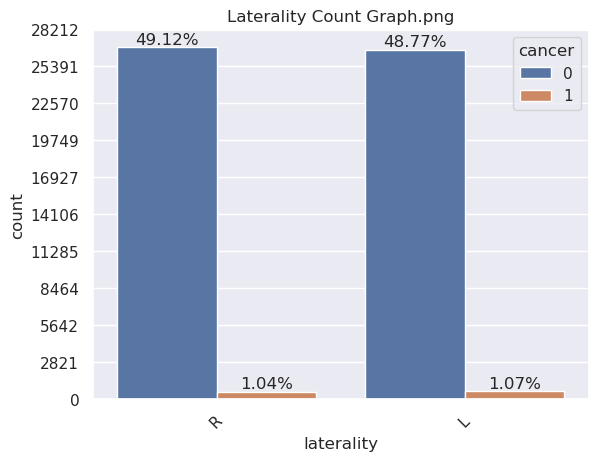

      view      Ratio
MLO  27903  51.005374
CC   26765  48.925164
AT      19   0.034731
LM      10   0.018280
ML       8   0.014624
LMO      1   0.001828
########################################## 



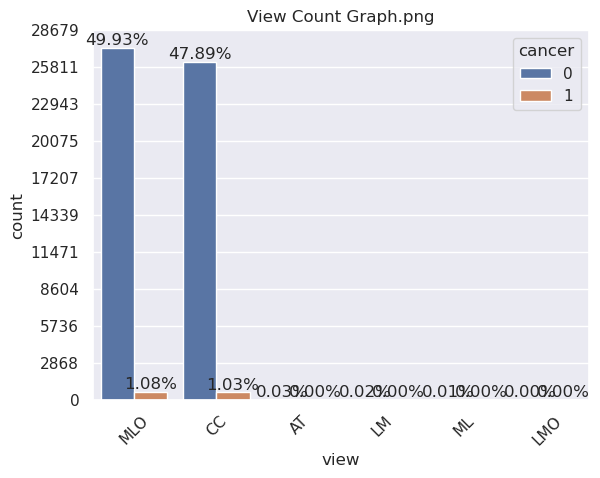

   density      Ratio
B    12651  23.125434
C    12175  22.255328
A     3105   5.675794
D     1539   2.813220
########################################## 



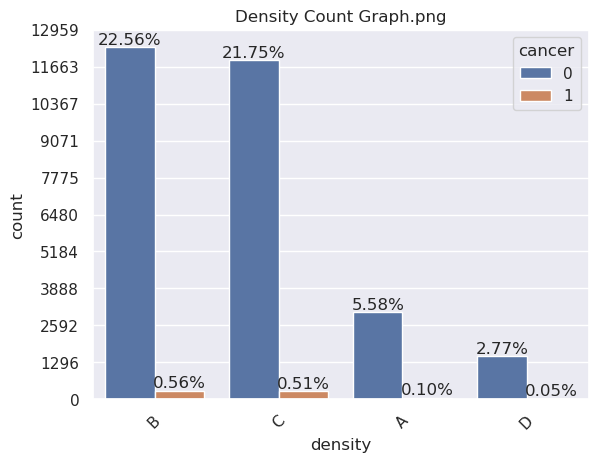

   site_id      Ratio
1    29519  53.959346
2    25187  46.040654
########################################## 



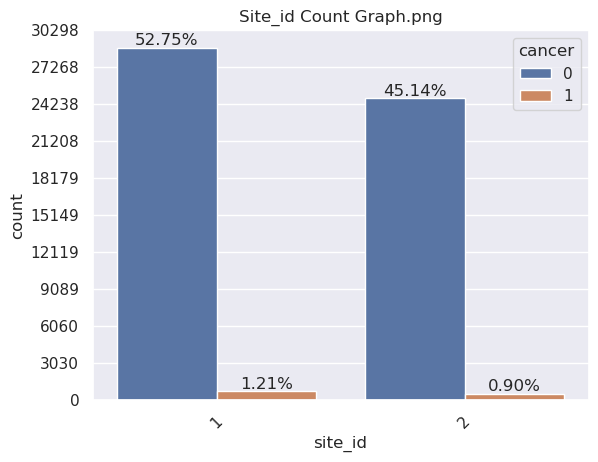

   cancer     Ratio
0   53548  97.88323
1    1158   2.11677
########################################## 



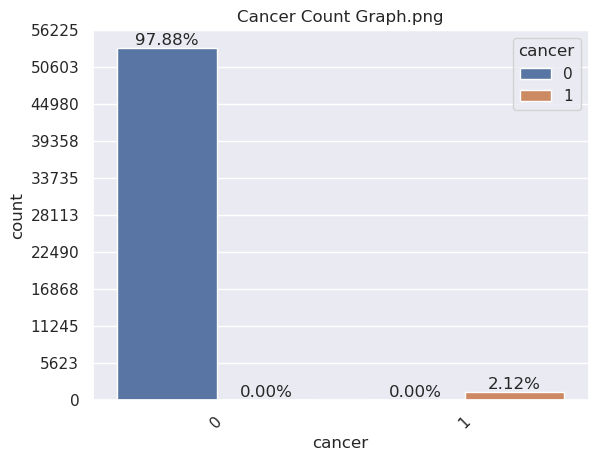

   biopsy      Ratio
0   51737  94.572807
1    2969   5.427193
########################################## 



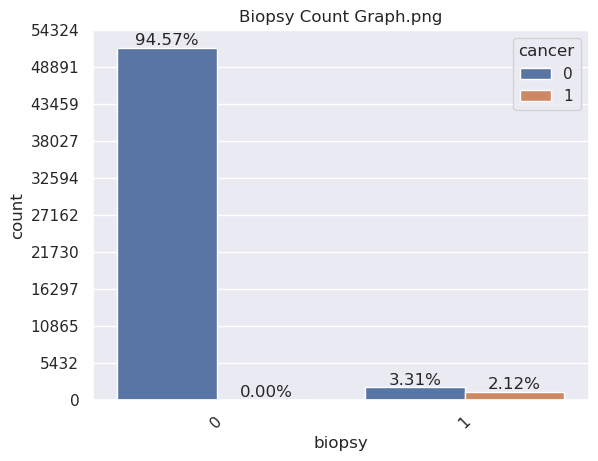

   invasive      Ratio
0     53888  98.504734
1       818   1.495266
########################################## 



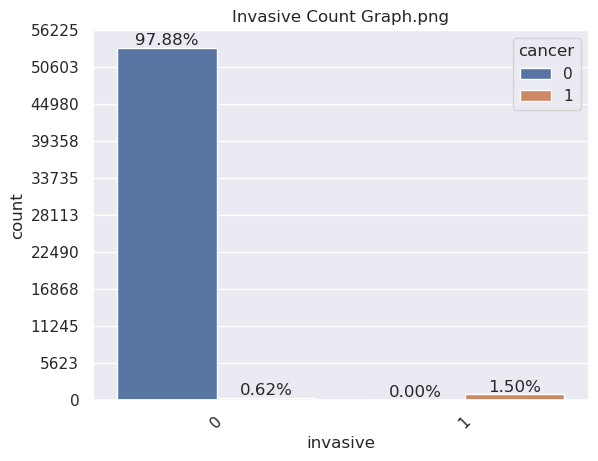

     BIRADS      Ratio
1.0   15772  28.830476
0.0    8249  15.078785
2.0    2265   4.140314
########################################## 



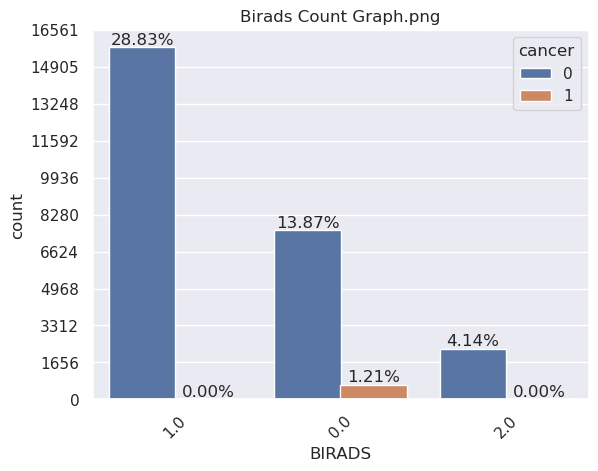

   implant      Ratio
0    53229  97.300113
1     1477   2.699887
########################################## 



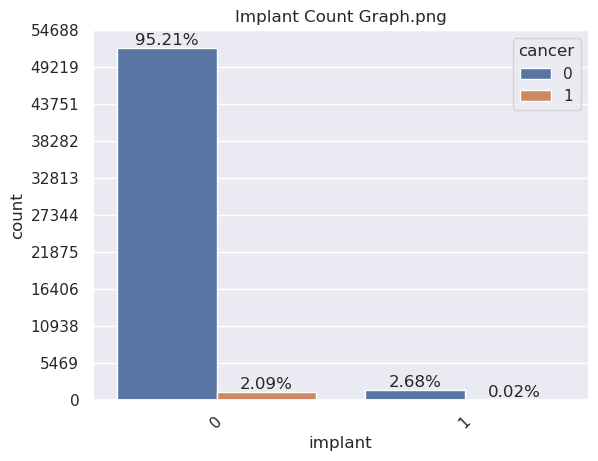

   difficult_negative_case      Ratio
0                    47001  85.915622
1                     7705  14.084378
########################################## 



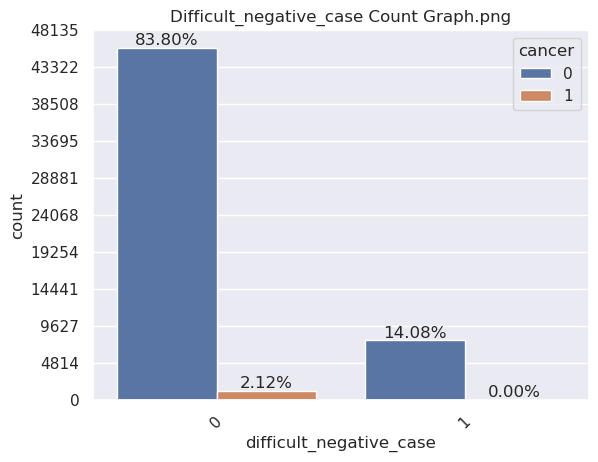

In [33]:
# Kategorik değişkenlerin incelenmesi

for col in categorical_cols:
    cat_summary(train_df, col, plot=True, savefig=False)

In [34]:
# Hedef Değişkenin Kategorik Değişkenlerle Analizi

def target_summary_with_categorical_data(dataframe, target, categorical_col):
    """
    It gives the summary of specified categorical column name according to target column.

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        target (string): The target column name are to be retrieved.
        categorical_col (string): The categorical column names are to be retrieved.
    """
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


In [35]:
for col in categorical_cols:
    target_summary_with_categorical_data(dataframe=train_df, target = target, categorical_col=col)

            TARGET_MEAN
laterality             
L              0.021565
R              0.020773


      TARGET_MEAN
view             
AT       0.105263
CC       0.021147
LM       0.000000
LMO      0.000000
ML       0.000000
MLO      0.021145


         TARGET_MEAN
density             
A           0.017069
B           0.024425
C           0.022752
D           0.016244


         TARGET_MEAN
site_id             
1           0.022494
2           0.019613


        TARGET_MEAN
cancer             
0               0.0
1               1.0


        TARGET_MEAN
biopsy             
0           0.00000
1           0.39003


          TARGET_MEAN
invasive             
0            0.006309
1            1.000000


        TARGET_MEAN
BIRADS             
0.0        0.080495
1.0        0.000000
2.0        0.000000


         TARGET_MEAN
implant             
0           0.021511
1           0.008802


                         TARGET_MEAN
difficult_negative_case             
0                         

**Analysis of Result of Categorical Variables**

The given dataset has several categorical columns, and we can analyze each of them to gain insights into the data.

* **Laterality**: This column shows the side of the breast that was imaged in the mammogram, either right or left. The ratio is almost equal, with a slight difference of 0.3% more images for the right side.

* **View**: This column indicates the type of image, which includes MLO, CC, AT, LM, ML, and LMO. MLO and CC views are the most common types, with 51% and 49% respectively. The remaining views make up a very small percentage of the dataset.

* **Density**: This column shows the density of the breast tissue, which is categorized as A, B, C, or D. The density level B is the most frequent, followed by C, A, and D, respectively.

* **Site_id**: This column indicates the facility where the mammogram was taken, and there are only two facilities in the dataset. The majority of the mammograms were taken at site_id 1, with a ratio of 53.9%.

* **Biopsy**: This column indicates whether a biopsy was performed on the patient. The vast majority of the mammograms did not have a biopsy performed, with a ratio of 94.6%.

* **Invasive**: This column indicates whether the biopsy performed was invasive or not. Only 1.5% of the biopsies were invasive, with the majority being non-invasive.

* **Implant**: This column indicates whether the patient had a breast implant. The majority of the patients did not have an implant, with a ratio of 97.3%.

* **Difficult_negative_case**: This column indicates whether the mammogram was considered difficult to read, and if it was a negative case. The majority of the mammograms were not considered difficult negative cases, with a ratio of 85.9%.

In [36]:
# Analysis of Numerical Variables

train_df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,54706.0,3.269887e+04,1.889386e+04,5.0,1.648100e+04,3.243200e+04,4.899900e+04,6.553400e+04
image_id,54706.0,1.079386e+09,6.183269e+08,68491.0,5.458153e+08,1.082689e+09,1.613228e+09,2.147472e+09
age,54669.0,5.854393e+01,1.005088e+01,26.0,5.100000e+01,5.900000e+01,6.600000e+01,8.900000e+01
machine_id,54706.0,5.461838e+01,4.478480e+01,21.0,2.900000e+01,4.900000e+01,4.900000e+01,2.160000e+02


In [37]:
def num_summary(dataframe, col_name, plot=False, savefig=False):
    """
    It gives the summary of numerical columns with a plot.

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        col_name (string): The column names from which features names are to be retrieved
        plot (bool, optional): Plot the figure of the specified column. Defaults to False.
        savefig(bool, optional): Save the figure of the specific column to the folder. Defaults to False

    """
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col_name].describe(quantiles).T)

    if plot:
        dataframe[col_name].hist()
        plt.xlabel(col_name)
        plt.title("{} Histogram Graph.png".format(col_name.capitalize()))
        if savefig:
            plt.savefig("{} Histogram Graph.png".format(col_name.capitalize()))
        plt.show(block=True)

count    54706.000000
mean     32698.865262
std      18893.861534
min          5.000000
5%        3315.000000
10%       6654.000000
20%      13144.000000
30%      19674.000000
40%      26074.000000
50%      32432.000000
60%      39042.000000
70%      45761.500000
80%      52462.000000
90%      58960.000000
95%      62284.000000
99%      64890.950000
max      65534.000000
Name: patient_id, dtype: float64


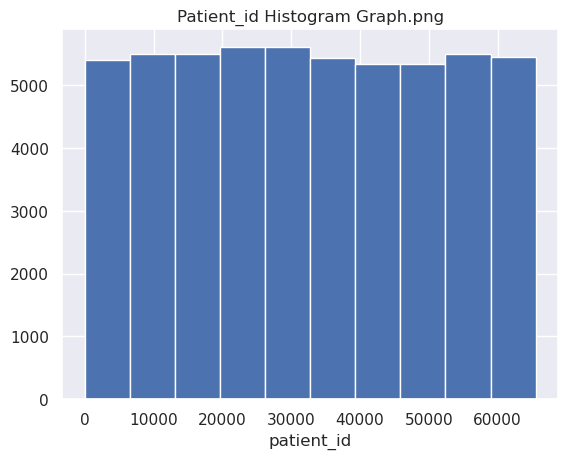

count    5.470600e+04
mean     1.079386e+09
std      6.183269e+08
min      6.849100e+04
5%       1.113745e+08
10%      2.185944e+08
20%      4.392019e+08
30%      6.515436e+08
40%      8.684111e+08
50%      1.082689e+09
60%      1.296442e+09
70%      1.506540e+09
80%      1.720659e+09
90%      1.935073e+09
95%      2.040921e+09
99%      2.125032e+09
max      2.147472e+09
Name: image_id, dtype: float64


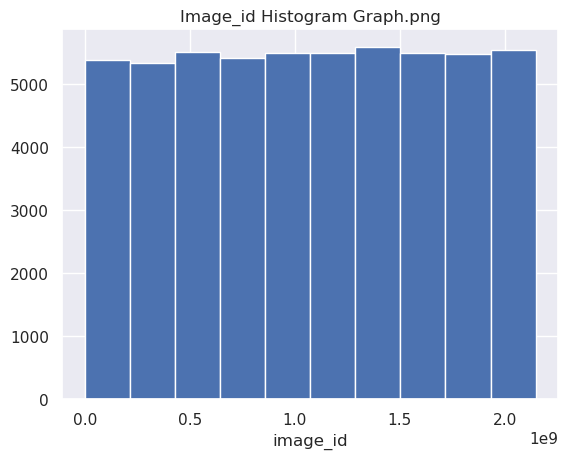

count    54669.000000
mean        58.543928
std         10.050884
min         26.000000
5%          42.000000
10%         45.000000
20%         50.000000
30%         53.000000
40%         56.000000
50%         59.000000
60%         61.000000
70%         64.000000
80%         67.000000
90%         71.000000
95%         75.000000
99%         82.000000
max         89.000000
Name: age, dtype: float64


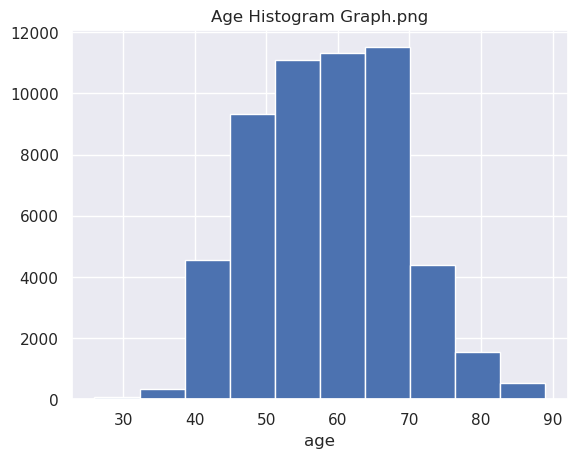

count    54706.000000
mean        54.618378
std         44.784800
min         21.000000
5%          21.000000
10%         21.000000
20%         29.000000
30%         29.000000
40%         48.000000
50%         49.000000
60%         49.000000
70%         49.000000
80%         49.000000
90%         93.000000
95%        210.000000
99%        216.000000
max        216.000000
Name: machine_id, dtype: float64


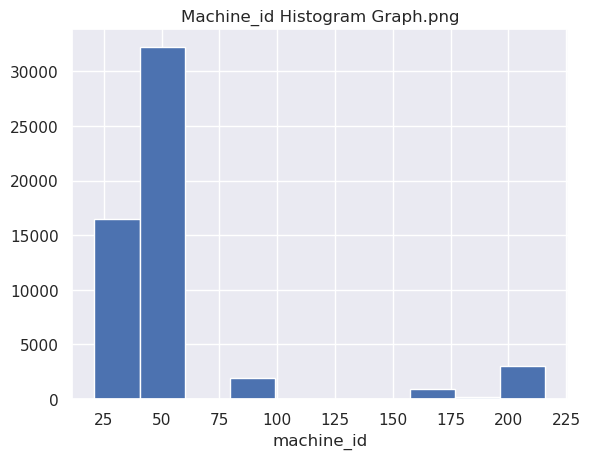

In [38]:
for col in numerical_cols:
    num_summary(train_df, col, True)

In [39]:
# Analysis of Target Variable with Numerical Variables

def target_summary_with_numerical_data(dataframe, target, numerical_col):
    """
    It gives the summary of specified numerical column name according to target column.

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        target (string): The target column name are to be retrieved.
        numerical_col (string): The numerical column names are to be retrieved.
    """
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [40]:
for col in numerical_cols:
    target_summary_with_numerical_data(train_df, target ,col)

          patient_id
cancer              
0       32707.904254
1       32280.886010


            image_id
cancer              
0       1.079366e+09
1       1.080325e+09


              age
cancer           
0       58.432808
1       63.678756


        machine_id
cancer            
0        54.782289
1        47.038860




**Analysis of Numerical Columns**

The dataset contains four numerical columns: patient_id, image_id, age, and machine_id.

* **age**: The average age of patients with cancer (1) is higher than patients without cancer (0), with cancer patients having an average age of 63.678756 compared to 58.432808 for non-cancer patients.
    * The '**age**' column has a mean value of 58.54 and a standard deviation of 10.05. The minimum and maximum values are 26 and 89, respectively. The majority of values fall within the 10th and 90th percentile range of 45 and 71, respectively.

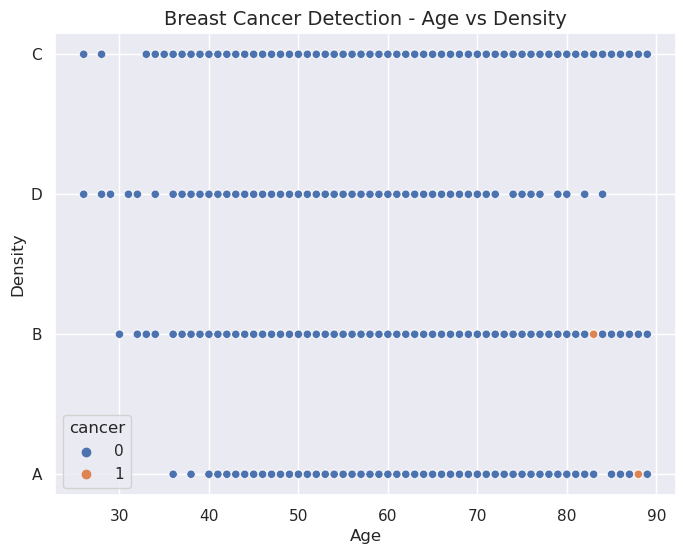

In [41]:
# Multivariate Plots (Scatter Plot / Histogram)

# scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_df, x='age', y='density', hue='cancer')
plt.title('Breast Cancer Detection - Age vs Density', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

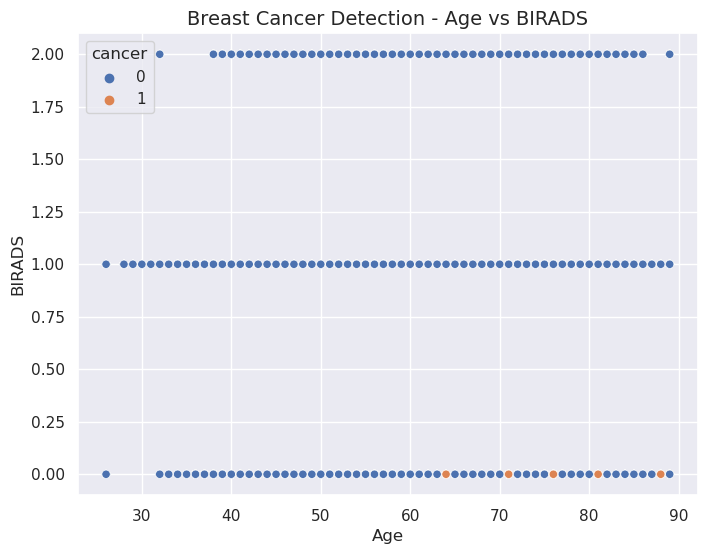

In [42]:
# scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_df, x='age', y='BIRADS', hue='cancer')
plt.title('Breast Cancer Detection - Age vs BIRADS', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('BIRADS', fontsize=12)
plt.show()

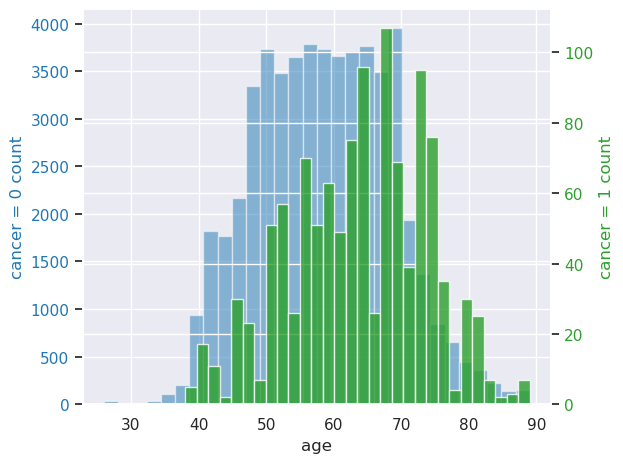

In [43]:
# Resource: https://www.kaggle.com/code/shujaat91/tensorflow-basic-eda-and-training-vit?scriptVersionId=115678766&cellId=7
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('age')
ax1.set_ylabel('cancer = 0 count', color= color)
ax1.hist(train_df.loc[train_df['cancer'] == 0, 'age'].dropna(), bins = 30, alpha = 0.5, label = '0', color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('cancer = 1 count', color=color) 
ax2.hist(train_df.loc[train_df['cancer'] == 1, 'age'].dropna(), bins=30, alpha=0.8, label='1', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

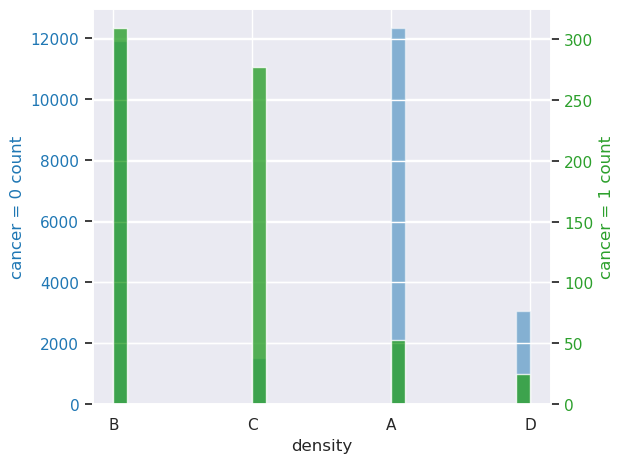

In [44]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('density')
ax1.set_ylabel('cancer = 0 count', color= color)
ax1.hist(train_df.loc[train_df['cancer'] == 0, 'density'].dropna(), bins = 30, alpha = 0.5, label = '0', color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('cancer = 1 count', color=color) 
ax2.hist(train_df.loc[train_df['cancer'] == 1, 'density'].dropna(), bins=30, alpha=0.8, label='1', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

<AxesSubplot:>

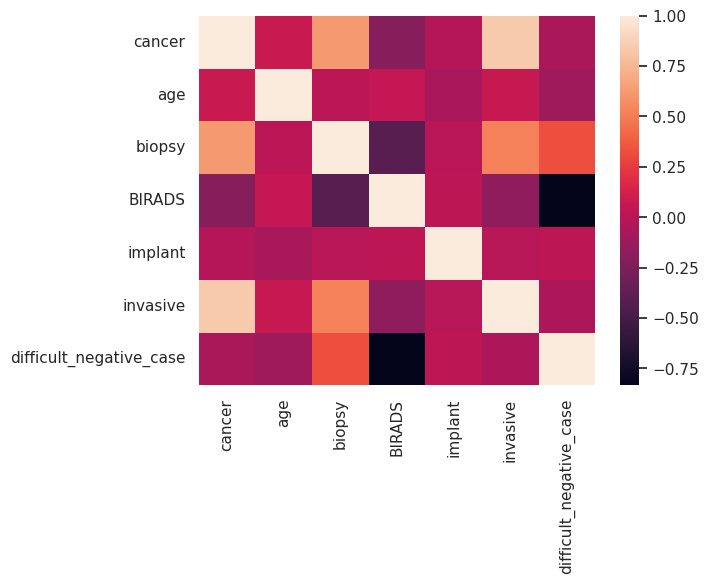

In [45]:
# Calculate the correlation matrix
corr = train_df[['cancer', 'age', 'view', 'laterality', 'biopsy', 'BIRADS', 'implant', 'invasive', 'density', 'difficult_negative_case']].corr()

# Heatmap of the correlation matrix
sns.heatmap(corr)

# C.3 Confirmatory Data Analysis



In [46]:
# Chi-Square test for Nominal Features

nominal_cols

['site_id',
 'cancer',
 'biopsy',
 'invasive',
 'BIRADS',
 'implant',
 'difficult_negative_case']

In [47]:
def chi2_by_hand(df, col1, col2):
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    display(df_cont)
    #---calculate degree of freedom---
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    #---sum up the totals for row and columns---
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()

    #---create the expected value dataframe---
    df_exp = df_cont.copy()
    df_exp.iloc[:,:] = np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values) / df_cont.sum().sum()

    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()

    #---get chi-square score---
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()

    #---calculate the p-value---
    from scipy import stats
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)

    return chi_square_score, degree_f, p

In [48]:
for col in nominal_cols:
    chi_score, degree_f, p = chi2_by_hand(train_df,col,target)
    print(f'Column: {col}, Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')


cancer,0,1
site_id,,
1,28855,664
2,24693,494


Column: site_id, Chi2_score: 5.443216300820419, Degrees of freedom: 1, p-value: 0.019644464094235214


cancer,0,1
cancer,,
0,53548,0
1,0,1158


Column: cancer, Chi2_score: 54706.000000000015, Degrees of freedom: 1, p-value: 0.0


cancer,0,1
biopsy,,
0,51737,0
1,1811,1158


Column: biopsy, Chi2_score: 20615.378387079578, Degrees of freedom: 1, p-value: 0.0


cancer,0,1
invasive,,
0,53548,340
1,0,818


Column: invasive, Chi2_score: 38399.970846973854, Degrees of freedom: 1, p-value: 0.0


cancer,0,1
BIRADS,,
0.0,7585,664
1.0,15772,0
2.0,2265,0


Column: BIRADS, Chi2_score: 1489.5070315858447, Degrees of freedom: 2, p-value: 0.0


cancer,0,1
implant,,
0,52084,1145
1,1464,13


Column: implant, Chi2_score: 11.203372182138146, Degrees of freedom: 1, p-value: 0.0008164881908404569


cancer,0,1
difficult_negative_case,,
0,45843,1158
1,7705,0


Column: difficult_negative_case, Chi2_score: 193.93929418611697, Degrees of freedom: 1, p-value: 4.3904934887085427e-44


The chi-square test was applied to the nominal features of the dataset to assess the statistical significance of their association with the target variable. The results showed that all nominal features, except for "site_id" and "implant", were strongly associated with the target variable "cancer", "biopsy", "invasive", "BIRADS", and "difficult_negative_case". The "BIRADS" feature had a p-value of 0.0, indicating a highly significant association with the target variable. The "site_id" and "implant" features also had a statistically significant association, but to a lesser extent compared to the other features. These results suggest that the nominal features can be useful in predicting the target variable and should be included in the model building process.

In [49]:
# ANOVA test for Numerical Features

import statsmodels.api as sm
from statsmodels.formula.api import ols

for col in numerical_cols:
    model = ols(target + '~' + col, data = train_df).fit() #Oridnary least square method
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print(result_anova)
    print("\n")

                 df       sum_sq   mean_sq         F    PR(>F)
patient_id      1.0     0.011997  0.011997  0.578982  0.446715
Residual    54704.0  1133.475811  0.020720       NaN       NaN


               df       sum_sq   mean_sq         F    PR(>F)
image_id      1.0     0.000057  0.000057  0.002727  0.958351
Residual  54704.0  1133.487751  0.020720       NaN       NaN


               df       sum_sq   mean_sq           F        PR(>F)
age           1.0     6.402172  6.402172  310.528909  2.606314e-69
Residual  54667.0  1127.069046  0.020617         NaN           NaN


                 df       sum_sq   mean_sq         F        PR(>F)
machine_id      1.0     0.702121  0.702121  33.90653  5.814657e-09
Residual    54704.0  1132.785686  0.020708       NaN           NaN




The ANOVA test was conducted to investigate the statistical significance of the difference between the groups within each numerical feature. The null hypothesis states that there is no significant difference between the groups, while the alternative hypothesis suggests that there is a difference. For the 'patient_id' and 'image_id' columns, the p-values were greater than the significance level of 0.05, indicating that there was no significant difference between the groups. On the other hand, for the 'age' and 'machine_id' columns, the p-values were less than 0.05, indicating a statistically significant difference between the groups. Therefore, we can reject the null hypothesis for 'age' and 'machine_id' and conclude that there is a significant difference between the groups.

# C.4 Data Analysis of DICOM images

In [50]:
train_df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,0
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,0
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,0
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,0
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,1


In [51]:
import os
import pandas as pd

train_dir = '../input/rsna-breast-cancer-detection/train_images/'

# Create a new DataFrame with patient_id, image_id, cancer, and image_path columns
image_df = train_df[['patient_id', 'image_id', 'cancer']].copy()
image_df['long_image_path'] = train_dir + image_df['patient_id'].astype(str) + '/' + image_df['image_id'].astype(str) + '.dcm'
image_df["short_image_path"] = image_df['patient_id'].astype(str) + '/' + image_df['image_id'].astype(str) + '.dcm'

# Check the resulting DataFrame
image_df.head()


,patient_id,image_id,cancer,long_image_path,short_image_path
0,10006,462822612,0,../input/rsna-breast-cancer-detection/train_im...,10006/462822612.dcm
1,10006,1459541791,0,../input/rsna-breast-cancer-detection/train_im...,10006/1459541791.dcm
2,10006,1864590858,0,../input/rsna-breast-cancer-detection/train_im...,10006/1864590858.dcm
3,10006,1874946579,0,../input/rsna-breast-cancer-detection/train_im...,10006/1874946579.dcm
4,10011,220375232,0,../input/rsna-breast-cancer-detection/train_im...,10011/220375232.dcm


In [52]:
image_df.loc[image_df["cancer"] == 0, "cancer"] = "negative"
image_df.loc[image_df["cancer"] == 1, "cancer"] = "positive"

In [53]:
training_df = image_df.head(1000)
training_df

,patient_id,image_id,cancer,long_image_path,short_image_path
0,10006,462822612,negative,../input/rsna-breast-cancer-detection/train_im...,10006/462822612.dcm
1,10006,1459541791,negative,../input/rsna-breast-cancer-detection/train_im...,10006/1459541791.dcm
2,10006,1864590858,negative,../input/rsna-breast-cancer-detection/train_im...,10006/1864590858.dcm
3,10006,1874946579,negative,../input/rsna-breast-cancer-detection/train_im...,10006/1874946579.dcm
4,10011,220375232,negative,../input/rsna-breast-cancer-detection/train_im...,10011/220375232.dcm
...,...,...,...,...,...
995,11032,2075246714,negative,../input/rsna-breast-cancer-detection/train_im...,11032/2075246714.dcm
996,11032,618839560,negative,../input/rsna-breast-cancer-detection/train_im...,11032/618839560.dcm
997,11032,1579825622,negative,../input/rsna-breast-cancer-detection/train_im...,11032/1579825622.dcm
998,11032,2085894046,negative,../input/rsna-breast-cancer-detection/train_im...,11032/2085894046.dcm


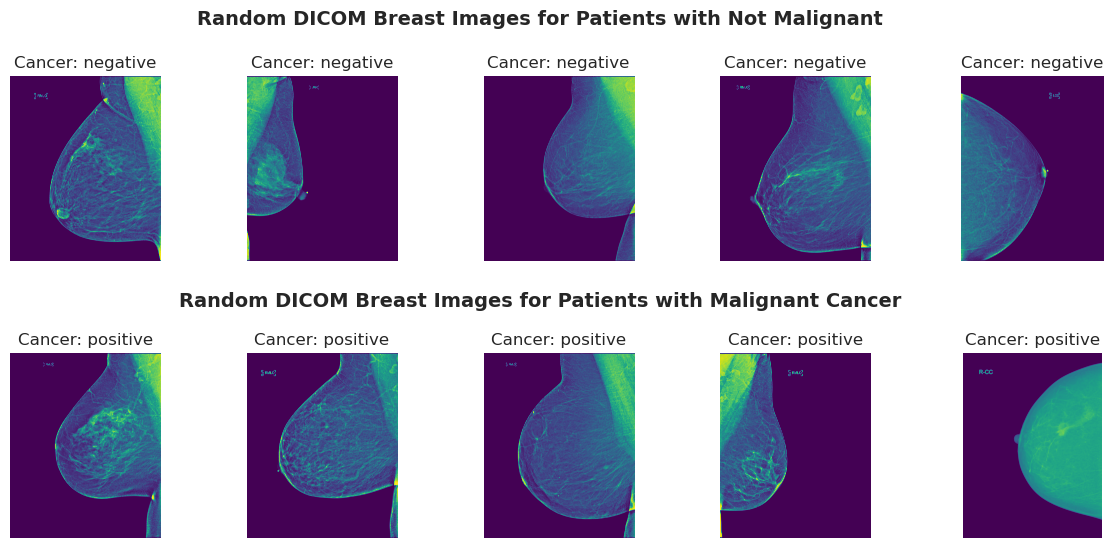

In [54]:
import random
import matplotlib.pyplot as plt
import pydicom
import numpy as np

# Set seed for randomization
random.seed(1337)

# Select 5 random patients with cancer = 0
random_patients_0 = image_df.loc[image_df['cancer'] == "negative", 'patient_id'].unique()
random_patients_0 = random.sample(list(random_patients_0), 5)

# Select 5 random patients with cancer = 1
random_patients_1 = image_df.loc[image_df['cancer'] == "positive", 'patient_id'].unique()
random_patients_1 = random.sample(list(random_patients_1), 5)

# Create figure and axes
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axs = axs.ravel()

arthopod_types = {0: 'Not Malignant', 1: 'Malignant Cancer'}

# Iterate over random patients and show random images for cancer = negative
for i, patient_id in enumerate(random_patients_0):
    # Get all images for the patient with cancer = negative
    patient_images = image_df.loc[(image_df['patient_id'] == patient_id) & (image_df['cancer'] == "negative")]
    # Select a random image
    random_image = patient_images.sample()
    # Load the DICOM file
    dcm_file = random_image['long_image_path'].values[0]
    ds = pydicom.dcmread(dcm_file)
    # Convert pixel data to numpy array
    img = ds.pixel_array.astype(float)
    # Rescale pixel values to 0-1 range
    img /= np.max(img)
    # Show the image
    # cmap='viridis'
    axs[i].imshow(img, cmap="viridis")
    axs[i].axis('off')
    axs[i].set_title(f'Cancer: {random_image["cancer"].values[0]}')


# Iterate over random patients and show random images for cancer = positive
for i, patient_id in enumerate(random_patients_1):
    # Get all images for the patient with cancer = positive
    patient_images = image_df.loc[(image_df['patient_id'] == patient_id) & (image_df['cancer'] == "positive")]
    # Select a random image
    random_image = patient_images.sample()
    # Load the DICOM file
    dcm_file = random_image['long_image_path'].values[0]
    ds = pydicom.dcmread(dcm_file)
    # Convert pixel data to numpy array
    img = ds.pixel_array.astype(float)
    # Rescale pixel values to 0-1 range
    img /= np.max(img)
    # Show the image
    axs[i+5].imshow(img, cmap="viridis")
    axs[i+5].axis('off')
    axs[i+5].set_title(f'Cancer: {random_image["cancer"].values[0]}')

# Add supertitle for the rows
plt.figtext(0.5,0.99, "Random DICOM Breast Images for Patients with Not Malignant", ha="center", va="top", fontsize=14, fontweight='bold')
plt.figtext(0.5,0.52, "Random DICOM Breast Images for Patients with Malignant Cancer", ha="center", va="top", fontsize=14, fontweight='bold')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.5)

# Show the plot
plt.show()


# D. Data Augmentation

In [55]:
# https://www.kaggle.com/code/shujaat91/tensorflow-basic-eda-and-training-vit?scriptVersionId=115678766&cellId=23

# Creating a custom generator class extends DataFrameIterator
class DCMDataFrameIterator(DataFrameIterator):
    
    # Constructor for the class that initializes
    def __init__(self, *arg, **kwargs):
        self.white_list_formats = ('dcm')
        super(DCMDataFrameIterator, self).__init__(*arg, **kwargs)
        self.dataframe = kwargs['dataframe']
        self.x = self.dataframe[kwargs['x_col']]
        self.y = self.dataframe[kwargs['y_col']]
        self.color_mode = kwargs['color_mode']
        self.target_size = kwargs['target_size']
        self.directory = kwargs['directory']
    
    # Method returns a batch of transformed samples
    def _get_batches_of_transformed_samples(self, indices_array):
        batch_x = np.array([self.read_dcm_as_array(self.directory + dcm_path, self.target_size, color_mode=self.color_mode) for dcm_path in self.x.iloc[indices_array]])
        batch_y = np.array([np.array(0) if i == "negative" else np.array(1) for i in self.y.iloc[indices_array]])
        batch_y = batch_y.reshape((-1, 1))
        
        # Apply random transformations to the batch if an image data generator is provided
        if self.image_data_generator is not None:
            for i, (x, y) in enumerate(zip(batch_x, batch_y)):
                transform_params = self.image_data_generator.get_random_transform(x.shape)
                batch_x[i] = self.image_data_generator.apply_transform(x, transform_params)
                
        return batch_x, batch_y
    
    # Method that reads DICOM images as numpy array
    @staticmethod
    def read_dcm_as_array(dcm_path, target_size=(256, 256), color_mode='rgb'):
        image_array = pydicom.dcmread(dcm_path).pixel_array
        image_array = cv2.resize(image_array, target_size, interpolation=cv2.INTER_NEAREST)
        image_array = np.expand_dims(image_array, -1)
        if color_mode == 'rgb':
            image_array = cv2.cvtColor(image_array, cv2.COLOR_GRAY2RGB)
        return image_array
    

# Setting up augmentation parameters for the train, validation and test data generators
train_augmentation_parameters = {
    'rescale': 1.0/255.0,
    'rotation_range': 10,
    'zoom_range': 0.2,
    'horizontal_flip': True,
    'fill_mode': 'nearest',
    'brightness_range': [0.8, 1.2],
    'validation_split': 0.2
}

valid_augmentation_parameters = {
    'rescale': 1.0/255.0,
    'validation_split': 0.2
}

test_augmentation_parameters = {
    'rescale': 1.0/255.0
}

# Setting up constants for the train, validation and test data generators
BATCH_SIZE = 32
CLASS_MODE = 'binary'
COLOR_MODE = 'grayscale'
TARGET_SIZE = (48, 48)
EPOCHS = 10
SEED = 1337

train_consts = {
    'seed': SEED,
    'batch_size': BATCH_SIZE,
    'class_mode': CLASS_MODE,
    'color_mode': COLOR_MODE,
    'target_size': TARGET_SIZE,  
    'subset': 'training'
}

valid_consts = {
    'seed': SEED,
    'batch_size': BATCH_SIZE,
    'class_mode': CLASS_MODE,
    'color_mode': COLOR_MODE,
    'target_size': TARGET_SIZE, 
    'subset': 'validation'
}

test_consts = {
    'batch_size': 1,
    'class_mode': CLASS_MODE,
    'color_mode': COLOR_MODE,
    'target_size': TARGET_SIZE,
    'shuffle': False
}

# Initializing an ImageDataGenerator object for augmenting the training and validation data
train_augmenter = ImageDataGenerator(**train_augmentation_parameters)
valid_augmenter = ImageDataGenerator(**valid_augmentation_parameters)


# Creating a custom iterator for the training data using DCMDataFrameIterator
train_generator = DCMDataFrameIterator(dataframe=training_df,
                             x_col='short_image_path',
                             y_col='cancer',
                             directory=train_dir,
                             image_data_generator=train_augmenter,
                             **train_consts)

valid_generator = DCMDataFrameIterator(dataframe=training_df,
                             x_col='short_image_path',
                             y_col='cancer',
                             directory=train_dir,
                             image_data_generator=valid_augmenter,
                             **valid_consts)


Found 800 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


# E. Modeling

In [ ]:
# Parameters for model

# The number of training examples in one forward/backward pass.
# Larger batch size require more memory but can result in faster training times and more stale gradients.
batch_size = 256

# The sşze (in pixels) to which the input images will be resized.
# This can affect the performance of the model, as larger images can provide more detail but require more computational resources.
image_size = 224

# The size (in pixels) of the patches that will be extracted from the input images.
#  These patches are then processed by the transformer layers in the model.
patch_size = 16

# The dimensionality of the embeddings that will be learned by the model.
# These embeddings represent each path of the input image and are used as input to the transformer layers.
projection_dim = 64

# The number of units in each layer of the transformer.
# The first value in the list corresponds to the number of units in the first hidden layer, 
# the second value correspond to the number of units in the second layer, and so on.
transformer_units = [projection_dim * 2, projection_dim,]

# The number of transformers layer in the model
# More layers can capture more complex relationships in the data but require more computation.
transformer_layers = 8

# The number of units in each layer of the MLP (multi-layer perceptron) head of the model.
# This head takes the output of the transformer layers and processes it to produce the final classification output.
mlp_head_units = [2048, 1024]

In [ ]:
"""
A functions called "MLP" is defined which takes in three arguments:
- x : input tensor to the MLP layers
- hidden_units: a list of integers representing the number of units in each hidden layer
- dropout_rate : a float representing the dropout rate to be applied after each hidden layer
"""
def MLPBlock(x, hidden_units, dropout_rate):
    """
    A for loop is defined to iterate over each element (integer) in the "hidden units" list.
    Inside the for loop:
    - a fully connected Dense layer is created with the specified number of units and gelu activation function
    - a dropout layer is applied to the output of the Dense layer with specified dropout rate
    """
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
# Define a custom layer for patch extraction from input image
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    # The call function extracts patches from the input images and reshapes them into a 2D tensor
    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches
        

In [ ]:
# Define a custome layer for encoding patches with projection and position embedding
class PatchEncoder(layers.Layer):
    
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )
    
    # The call function encodes each patch with projection and position embedding
    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
# Define a function called 'VITModel' that takes input shape and number of classes as inputs
def VITModel(input_shape=(image_size, image_size, 3), classes=3):
    
    # Create input layer with input_shape
    inputs = layers.Input(shape=input_shape)

    # Extract patches from the input using 'Patches' function and 'patch_size'
    patches = Patches(patch_size)(inputs)

    # Calculate the number of patches
    num_patches = (input_shape[0] // patch_size) ** 2

    # Encode the patches using 'PatchEncoder' function and 'projection_dim'
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Implement 'transformer_layers' number of transformer layers
    for _ in range(transformer_layers):
        # Normalize the encoded patches
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Apply multi-head attention to the normalized patches
        attention_output = layers.MultiHeadAttention(
            num_heads=4, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Add the attention output to the encoded patches
        x2 = layers.Add()([attention_output, encoded_patches])
        # Normalize the output of the previous step
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # Apply a multi-layer perceptron (MLP) to the normalized output
        x3 = MLPBlock(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Add the output of the MLP to the output of the previous step
        encoded_patches = layers.Add()([x3, x2])

    # Normalize the output of the final transformer layer
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    # Flatten the representation
    representation = layers.Flatten()(representation)
    # Apply dropout to the representation
    representation = layers.Dropout(0.5)(representation)
    # Apply an MLP to the representation to obtain the features
    features = MLPBlock(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Apply a sigmoid activation function to the output of the MLP to obtain the logits
    logits = layers.Dense(classes, activation="sigmoid")(features)
    # Create a Keras model with inputs and logits as outputs
    model = keras.models.Model(inputs=inputs, outputs=logits)
    
    # Return the model
    return model


In [ ]:
model = VITModel((48,48,1),1)

In [ ]:
model.summary()

In [ ]:
EPOCHS = 5
model.compile("adam", "binary_crossentropy",["accuracy"])
early_stop_callback = tf.keras.callbacks.EarlyStopping(patience=2,
                                                      restore_best_weights=True)
callbacks = [early_stop_callback]
model.fit(train_generator,
         epochs=EPOCHS,
         validation_data = valid_generator,
         callbacks = callbacks)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
from joblib import Parallel, delayed
test_images = glob.glob("/kaggle/input/rsna-breast-cancer-detection/test_images/*/*.dcm")

image_dir = '/kaggle/tmp/test_images'
os.makedirs(image_dir, exist_ok=True)

image_size = 48
dcm_dir  = '/kaggle/input/rsna-breast-cancer-detection/test_images'

def dicom_to_png(dcm_file, image_size=image_size, image_dir=''):
    patient_id = dcm_file.split('/')[-2]
    image_id   = dcm_file.split('/')[-1][:-4]

    dicom = pydicom.dcmread(dcm_file)
    img = dicom.pixel_array
    img = (img - img.min()) / (img.max() - img.min())
    if dicom.PhotometricInterpretation == 'MONOCHROME1':
        img = 1 - img

    img = cv2.resize(img, (image_size, image_size), interpolation=cv2.INTER_LINEAR)
    img = (img * 255).astype(np.uint8)
    cv2.imwrite(image_dir +'/'+ f'{patient_id}_{image_id}.png', img)


dcm_file = dcm_dir + '/' + test_df.patient_id.astype(str) + '/'  + test_df.image_id.astype(str) + '.dcm'
Parallel(n_jobs=2)(
        delayed(dicom_to_png)(f, image_size=image_size, image_dir=image_dir)
        for f in tqdm(dcm_file))

def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels = 1)
    img = tf.image.resize(img, [image_size, image_size])
    img = tf.cast(img, dtype = tf.float32)
    img = img/255.0
    return img

test_image_paths = []
test_dir = os.listdir('/kaggle/tmp/test_images')
for i in range(len(test_dir)):
    img_path = '/kaggle/tmp/test_images' + '/' + test_dir[i]
    test_image_paths.append(img_path)
test_img_path_ds = tf.data.Dataset.from_tensor_slices(test_image_paths)
test_ds = test_img_path_ds.map(load_image, num_parallel_calls = AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

In [ ]:
image_path = '/kaggle/input/rsna-breast-cancer-detection/train_images/10179/2015481666.dcm'
def check_for_cancer(image_path):
     prediction_image = load_image(image_path)
    
     return model.predict(prediction_image)

In [ ]:
preds = model.predict(test_ds)
preds

In [ ]:
def dicom_to_png(dicom_path):
    dicom = pydicom.dcmread(dicom_path)
    image = dicom.pixel_array.astype(float)

    # Normalize the image
    image = (image - image.min()) / (image.max() - image.min())

    # Handle MONOCHROME1 by inverting the grayscale values
    if dicom.PhotometricInterpretation == 'MONOCHROME1':
        image = 1.0 - image

    # Resize image
    image = cv2.resize(image, (image_size, image_size))
    image = np.expand_dims(image, axis=-1)  # Add channel dimension for grayscale
    return image

def predict_breast_cancer(model, dicom_path):
    # Convert DICOM to array that can be used by the model
    image = dicom_to_png(dicom_path)
    image = image / 255.0  # Normalize to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(image)
    
    # Convert prediction to a human-readable label
    if prediction[0] >= 0.5:
        result = "Breast cancer present"
    else:
        result = "No breast cancer"
    
    return result

dicom_path = '/kaggle/input/rsna-breast-cancer-detection/train_images/10179/2015481666.dcm'

# Predict on the DICOM image
prediction = predict_breast_cancer(model, dicom_path)
print(prediction)



In [ ]:
test_df2 = pd.read_csv("/kaggle/input/rsna-breast-cancer-detection/test.csv")
test_df2['cancer'] = 0

THRESHOLD = 0.02

preds = (preds > THRESHOLD).astype(int)
test_df2["cancer"] = preds

In [ ]:
model.save('my_model')


In [ ]:
class Patches(keras.layers.Layer):
    def __init__(self, patch_size, scaling_factor=1.0, **kwargs):
        super(Patches, self).__init__(**kwargs)
        self.patch_size = patch_size
        self.scaling_factor = scaling_factor

    def build(self, input_shape):
        # You can add any weight initializations if needed
        pass

    def call(self, inputs):
        # Define the functionality of your layer here
        # Dummy operation: extracting patches and scaling
        sizes = [1, self.patch_size, self.patch_size, 1]
        strides = [1, self.patch_size, self.patch_size, 1]
        rates = [1, 1, 1, 1]
        patches = tf.image.extract_patches(inputs,
                                           sizes=sizes,
                                           strides=strides,
                                           rates=rates,
                                           padding='VALID')
        return patches * self.scaling_factor

    def get_config(self):
        config = super(Patches, self).get_config()
        config.update({
            'patch_size': self.patch_size,
            'scaling_factor': self.scaling_factor
        })
        return config

    
    
model.save('my_model.h5')
     


In [ ]:
model.summary()

In [ ]:
import tensorflow as tf
from tensorflow import keras

class Patches(keras.layers.Layer):
    def __init__(self, patch_size, scaling_factor=1.0, **kwargs):
        super(Patches, self).__init__(**kwargs)
        self.patch_size = patch_size
        self.scaling_factor = scaling_factor

    def build(self, input_shape):
        # You can add any weight initializations if needed
        pass

    def call(self, inputs):
        # Define the functionality of your layer here
        # Dummy operation: extracting patches and scaling
        sizes = [1, self.patch_size, self.patch_size, 1]
        strides = [1, self.patch_size, self.patch_size, 1]
        rates = [1, 1, 1, 1]
        patches = tf.image.extract_patches(inputs,
                                           sizes=sizes,
                                           strides=strides,
                                           rates=rates,
                                           padding='VALID')
        return patches * self.scaling_factor

    def get_config(self):
        config = super(Patches, self).get_config()
        config.update({
            'patch_size': self.patch_size,
            'scaling_factor': self.scaling_factor
        })
        return config

# Example usage in a model
input_layer = keras.Input(shape=(None,48, 48, 1))  # Adjust input shape as necessary
x = Patches(None,None,256)(input_layer)  # Example usage of the custom layer
output_layer = keras.layers.Flatten()(x)
output_layer = keras.layers.Dense(1)(output_layer)
model = keras.Model(inputs=input_layer, outputs=output_layer)



# Save the model
model.save('my_custom_model')

# Load the model
loaded_model = keras.models.load_model('my_custom_model', custom_objects={'Patches': Patches})

print("Model loaded successfully")


In [ ]:
model= tf.keras.mod
model.save('my_model.h5', save_format='tf')

In [ ]:
# Save model architecture as JSON
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights
model.save_weights('model_weights.h5')

In [ ]:
model.save('my_model.h5')
           

In [ ]:
import os
import tensorflow as tf
from IPython.display import FileLink

model.save('my_model')
os.system('zip -r my_model.zip my_model')

# Create a clickable link to download the ZIP file
download_link = FileLink('my_model.zip', result_html_prefix="Click here to download: ")
display(download_link)

In [ ]:
import os
import pandas as pd

# Set the path to the dataset directory
dataset_dir = ''

# Load the CSV file containing the labels
labels_df = pd.read_csv('path/to/labels.csv')

# Create a dictionary to store the paths of cancer images
cancer_image_paths = {}

# Iterate through the dataset directory
for dir_name in os.listdir(dataset_dir):
    dir_path = os.path.join(dataset_dir, dir_name)
    
    # Check if the directory contains cancer images
    if dir_name in labels_df['label'].values:
        cancer_image_paths[dir_name] = []
        
        # Iterate through the images in the directory
        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)
            
            # Add the path of the cancer image to the dictionary
            cancer_image_paths[dir_name].append(file_path)

# Print the paths of the cancer images
for dir_name, paths in cancer_image_paths.items():
    print(f"Directory '{dir_name}' contains cancer images:")
    for path in paths:
        print(path)

In [ ]:
import random
import matplotlib.pyplot as plt
import pydicom
import numpy as np

# Set seed for randomization
random.seed(1337)

# Select 5 random patients with cancer = 0
random_patients_0 = image_df.loc[image_df['cancer'] == "negative", 'patient_id'].unique()
random_patients_0 = random.sample(list(random_patients_0), 5)

# Select 5 random patients with cancer = 1
random_patients_1 = image_df.loc[image_df['cancer'] == "positive", 'patient_id'].unique()
random_patients_1 = random.sample(list(random_patients_1), 5)

# Create figure and axes
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axs = axs.ravel()

arthopod_types = {0: 'Not Malignant', 1: 'Malignant Cancer'}

# Iterate over random patients and show random images for cancer = negative
for i, patient_id in enumerate(random_patients_0):
    # Get all images for the patient with cancer = negative
    patient_images = image_df.loc[(image_df['patient_id'] == patient_id) & (image_df['cancer'] == "negative")]
    # Select a random image
    random_image = patient_images.sample()
    # Load the DICOM file
    dcm_file = random_image['long_image_path'].values[0]
    ds = pydicom.dcmread(dcm_file)
    # Convert pixel data to numpy array
    img = ds.pixel_array.astype(float)
    # Rescale pixel values to 0-1 range
    img /= np.max(img)
    # Show the image
    axs[i].imshow(img, cmap="viridis")
    axs[i].axis('off')
    axs[i].set_title(f'Cancer: {random_image["cancer"].values[0]}')

# Iterate over random patients and show random images for cancer = positive
for i, patient_id in enumerate(random_patients_1):
    # Get all images for the patient with cancer = positive
    patient_images = image_df.loc[(image_df['patient_id'] == patient_id) & (image_df['cancer'] == "positive")]
    # Select a random image
    random_image = patient_images.sample()
    # Load the DICOM file
    dcm_file = random_image['long_image_path'].values[0]
    ds = pydicom.dcmread(dcm_file)
    # Convert pixel data to numpy array
    img = ds.pixel_array.astype(float)
    # Rescale pixel values to 0-1 range
    img /= np.max(img)
    # Show the image
    axs[i+5].imshow(img, cmap="viridis")
    axs[i+5].axis('off')
    axs[i+5].set_title(f'Cancer: {random_image["cancer"].values[0]}')
    # Output the DICOM image path
    print(f"Patient ID: {patient_id}, Cancer: {random_image['cancer'].values[0]}, DICOM Image Path: {dcm_file}")

# Add supertitle for the rows
plt.figtext(0.5,0.99, "Random DICOM Breast Images for Patients with Not Malignant", ha="center", va="top", fontsize=14, fontweight='bold')
plt.figtext(0.5,0.52, "Random DICOM Breast Images for Patients with Malignant Cancer", ha="center", va="top", fontsize=14, fontweight='bold')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.5)

# Show the plot
plt.show()
